# Data Preprocessing

In [30]:
import pandas as pd
import numpy as np

import pickle 

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import Warnings
import warnings
warnings.filterwarnings("ignore")

## Game Names data

In [2]:
# Load games data
df = pd.read_json('../Data/steam/gamesdata.json')
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN,NaN


In [3]:
# Get relevant columns
gamenames = df[['title', 'id']]
gamenames.head()

,title,id
0,Lost Summoner Kitty,761140.0
1,Ironbound,643980.0
2,Real Pool 3D - Poolians,670290.0
3,弹炸人2222,767400.0
4,NaN,773570.0


In [4]:
# Save as csv
gamenames.to_csv('gamenames.csv')

## User items Data

In [18]:
# Load users/items data
useritems = pd.read_json('../Data/steam/data.json')
useritems.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864384,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712560,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445856,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099488,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [19]:
# Look at number of users
len(useritems)

88310

In [20]:
# Describe items count feature
useritems['items_count'].describe()

count    88310.000000
mean        58.353629
std        122.312095
min          0.000000
25%          3.000000
50%         26.000000
75%         73.000000
max       7762.000000
Name: items_count, dtype: float64

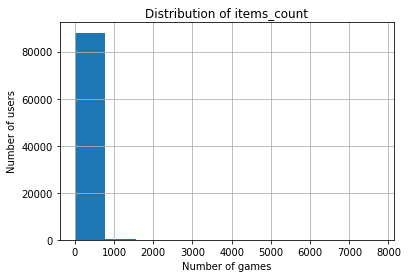

In [21]:
# Plot distribution of items count
useritems['items_count'].hist()
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.title('Distribution of items_count')
plt.show()

In [22]:
# Take entries where user owns 10 or more games
useritems = useritems[useritems['items_count'] >= 10]

# Get count
len(useritems)

57892

In [23]:
# Downsample - take 10% of users
useritemsample = useritems.sample(frac = 0.1)
# Reset index
useritemsample = useritemsample.reset_index(drop = True)
# Check
useritemsample.head()

,user_id,items_count,steam_id,user_url,items
0,76561198091296589,18,76561198091296592,http://steamcommunity.com/profiles/76561198091...,"[{'item_id': '320', 'item_name': 'Half-Life 2:..."
1,76561198084940434,40,76561198084940432,http://steamcommunity.com/profiles/76561198084...,"[{'item_id': '205790', 'item_name': 'Dota 2 Te..."
2,mytesticlelolol,69,76561198022943136,http://steamcommunity.com/id/mytesticlelolol,"[{'item_id': '240', 'item_name': 'Counter-Stri..."
3,76561198054015461,38,76561198054015456,http://steamcommunity.com/profiles/76561198054...,"[{'item_id': '4000', 'item_name': 'Garry's Mod..."
4,76561198063070143,56,76561198063070144,http://steamcommunity.com/profiles/76561198063...,"[{'item_id': '105600', 'item_name': 'Terraria'..."


In [24]:
# Preview items column values for first user
# Restrict to first 2 items in dictionary

useritemsample['items'][0][0:2]

[{'item_id': '320',
  'item_name': 'Half-Life 2: Deathmatch',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '340',
  'item_name': 'Half-Life 2: Lost Coast',
  'playtime_forever': 0,
  'playtime_2weeks': 0}]

We will look to extract the `item_id`s into a seperate column. For now we will leave the playtime data but look to incorporate it later.

In [25]:
# Get all item_id for first user
gameids = [useritemsample['items'][0][index]['item_id'] for index, _ in enumerate(useritemsample['items'][0])]
# Show first 10 item ids
gameids[:10]

['320', '340', '360', '380', '4000', '550', '223530', '730', '205790', '99900']

In [26]:
# Create column with item ids
useritemsample['item_id'] = useritemsample['items'].apply(lambda x: [x [index]['item_id'] for index, _ in enumerate(x)])
useritemsample.head()

,user_id,items_count,steam_id,user_url,items,item_id
0,76561198091296589,18,76561198091296592,http://steamcommunity.com/profiles/76561198091...,"[{'item_id': '320', 'item_name': 'Half-Life 2:...","[320, 340, 360, 380, 4000, 550, 223530, 730, 2..."
1,76561198084940434,40,76561198084940432,http://steamcommunity.com/profiles/76561198084...,"[{'item_id': '205790', 'item_name': 'Dota 2 Te...","[205790, 304930, 227700, 206500, 230410, 24387..."
2,mytesticlelolol,69,76561198022943136,http://steamcommunity.com/id/mytesticlelolol,"[{'item_id': '240', 'item_name': 'Counter-Stri...","[240, 300, 320, 340, 220, 360, 380, 400, 420, ..."
3,76561198054015461,38,76561198054015456,http://steamcommunity.com/profiles/76561198054...,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 7670, 409710, 400, 500, 550, 223530, 62..."
4,76561198063070143,56,76561198063070144,http://steamcommunity.com/profiles/76561198063...,"[{'item_id': '105600', 'item_name': 'Terraria'...","[105600, 227680, 22200, 205790, 242920, 108600..."


In [27]:
# Add a column with substitute user_id
useritemsample['uid'] = np.arange(len(useritemsample))

# Take relevant columns
useritemsample = useritemsample[['uid', 'item_id']]

# Check
useritemsample.head()

,uid,item_id
0,0,"[320, 340, 360, 380, 4000, 550, 223530, 730, 2..."
1,1,"[205790, 304930, 227700, 206500, 230410, 24387..."
2,2,"[240, 300, 320, 340, 220, 360, 380, 400, 420, ..."
3,3,"[4000, 7670, 409710, 400, 500, 550, 223530, 62..."
4,4,"[105600, 227680, 22200, 205790, 242920, 108600..."


In [28]:
# Explode item_ids into seperate rows
lst_col = 'item_id'
useritemsample = pd.DataFrame({col:np.repeat(useritemsample[col].values, useritemsample[lst_col].str.len())
                              for col in useritemsample.columns.difference([lst_col])
                        }).assign(**{lst_col:np.concatenate(useritemsample[lst_col].values)})[useritemsample.columns.tolist()]
# Check
useritemsample.head()

,uid,item_id
0,0,320
1,0,340
2,0,360
3,0,380
4,0,4000


In [29]:
# Get most popular games

# Create dictionary of counts
gamesdict = {}
for game in list(useritemsample['item_id']):
    if not game in gamesdict:
        gamesdict[game] = 1
    else:
        gamesdict[game] += 1

In [41]:
# Get number of unique games
len(gamesdict)

8309

In [42]:
# Get top 500 games
top500games = dict(Counter(gamesdict).most_common(500))

# Take keys and form list
top500gameids = list(top500games.keys())

# Check
top500gameids[:10]

['205790',
 '730',
 '4000',
 '304930',
 '550',
 '223530',
 '105600',
 '230410',
 '620',
 '240']

In [52]:
# Reduce useritems to only have top 500 games
useritemsreduced = useritemsample[useritemsample['item_id'].isin(top500gameids)]

#Check
useritemsreduced.head()

,uid,item_id
0,0,320
1,0,340
2,0,360
3,0,380
4,0,4000


In [54]:
len(useritemsreduced)

312580

In [55]:
density = lambda useritemsreduced : len(useritemsreduced) / (useritemsreduced['uid'].nunique() * useritemsreduced['item_id'].nunique())

In [56]:
print("Unique user ids :", useritemsreduced['uid'].nunique())
print("Unique item ids :", useritemsreduced['item_id'].nunique())
print("Density : {0:.2f} %".format(density(useritemsreduced) * 100))

Unique user ids : 5788
Unique item ids : 500
Density : 10.80 %


In [57]:
# Add binary owned column
useritemsreduced['owned'] = np.ones(shape = useritemsreduced.shape[0])

# Check
useritemsreduced.head()

,uid,item_id,owned
0,0,320,1.0
1,0,340,1.0
2,0,360,1.0
3,0,380,1.0
4,0,4000,1.0


In [58]:
# Pivot table
useritemspivot = useritemsreduced.pivot_table(index = ['uid'], columns = ['item_id'], values = 'owned')
useritemspivot.head()

item_id,10,100,10090,10180,10190,102600,104700,104900,10500,105450,...,9310,9340,9350,9420,94400,9450,9480,96100,9900,99900
uid,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Fill nan with 0
useritemspivot = useritemspivot.fillna(0)
useritemspivot.head()

item_id,10,100,10090,10180,10190,102600,104700,104900,10500,105450,...,9310,9340,9350,9420,94400,9450,9480,96100,9900,99900
uid,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
useritemspivot.to_csv('uipivot.csv')

In [61]:
uidf = pd.read_csv('uipivot.csv')
uidf.head()

,uid,10,100,10090,10180,10190,102600,104700,104900,10500,...,9310,9340,9350,9420,94400,9450,9480,96100,9900,99900
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Get list of column names
cols = list(uidf.columns)[1:]

# Use melt to unpivot dataframe
useritemsmelt = pd.melt(uidf, id_vars = ['uid'], value_vars=cols)

# Check
useritemsmelt.head()

,uid,variable,value
0,0,10,0.0
1,1,10,0.0
2,2,10,0.0
3,3,10,0.0
4,4,10,0.0


In [63]:
# Save as csv
useritemsmelt.to_csv('uimelt.csv')